# Machine Learning for Remote Sensing and GIS (GEOG-790-S3)
#### Course Instructor: Dr. Maitiniyazi Maimaitijiang, Department of Geography & Geospatial Sciences, SDSU

# Scene/Image-based classification

## Learning Objectives:

* Understand scene/image-based classification
* Be able to apply commonly used machine learning algorithms to scene/image-based classification tasks
* Be ableto apply parameter tuning in classification applications


In [7]:
# Import Lib
import os
import glob
from PIL import Image
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
from rasterstats import zonal_stats, point_query
from pprint import pprint
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

os.chdir(r"D:\Teaching\2022Spring\ML_RS_GIS\labs\lab_resutls") # define default work diractory


# 1. Data Preprocessing for pixel-based classification 
## (VERY IMPORTANT!!!)

In [84]:
img_path = r'D:\Teaching\2022Spring\ML_RS_GIS\labs\Lab_5\scene_image_based_classification_data'

X_train = []
y_train = [] 
X_test = []    
y_test = []

img_rows = 128
img_cols = 128
bands = 3
label = 0

test_size=0.3
random_state=1

for folder in os.listdir(img_path):
    folder = img_path + '/' + folder
   
    X_class = []
    y_class = []
    
    for img in glob.glob(folder + '/*.tif'):  
        img = Image.open(img)
        img = np.array(img)
        img = np.resize(img,(img_rows,img_cols,bands))
        img = img.flatten()   
        X_class.append(img)
        y_class.append(label)
        
    X_class = pd.DataFrame(X_class)
    y_class = pd.DataFrame(y_class)
    
    X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=test_size, random_state=random_state)
    
    X_train.append(X_train_class)
    X_test.append(X_test_class)
    y_train.append(y_train_class)
    y_test.append(y_test_class)        
    label = label+1

# Merge multiple dataframes      
X_train = pd.concat(X_train)
y_train = pd.concat(y_train)
X_test = pd.concat(X_test)    
y_test = pd.concat(y_test)

# Convert dataframes numpy arraries
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()   
y_test = y_test.to_numpy()

# change the shape of y from (n_samples,1)  to (n_samples,)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)


### 2. Radom Forest (RF) based Classification

In [85]:
# Train Random forest classication model
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)


RandomForestClassifier()

Mode Training accuracy:  1.000
Model Training kappa:  1.000
Model Training f-score:  1.000
[[70  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 70  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 70  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 70  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 70  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 70  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 70  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 70  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 70  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 70  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 70  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 70  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 70  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 70  0  0  

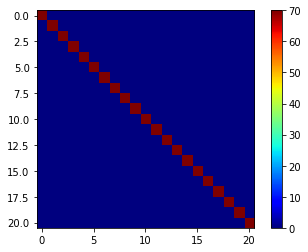

In [86]:
# Evaluate the performance of the model at the Training/calibration phase
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score

y_pred_train = model_RF.predict(X_train)

print('Mode Training accuracy: % .3f' % accuracy_score(y_train, y_pred_train))
print('Model Training kappa: % .3f' % cohen_kappa_score(y_train, y_pred_train))
print('Model Training f-score: % .3f' % f1_score(y_train, y_pred_train, average = 'weighted'))
cm_testing = confusion_matrix(y_train, y_pred_train)
print(cm_testing)
plt.imshow(cm_testing,cmap = 'jet')
plt.colorbar()
plt.show()


Mode Testing accuracy:  0.276
Model Testing kappa:  0.240
Model Training f-score:  0.233
[[12  0  2  2  0  1  0  0  2  3  0  0  0  0  1  1  0  4  2  0  0]
 [ 1  6  0  7  0  2  1  1  1  1  1  0  1  0  1  0  0  3  1  3  0]
 [ 4  1  3  2  0  2  0  0  2  7  0  1  0  1  1  0  0  3  3  0  0]
 [ 0  1  0 27  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  1  0  3  6  0  1  1  0  0 11  0  2  2  0  0  1  0  0  2  0]
 [ 1  1  2  0  0 17  1  0  1  1  0  0  2  0  1  0  0  1  2  0  0]
 [ 0  2  0  0  7  3  3  1  2  0  4  1  1  2  2  1  0  0  0  0  1]
 [ 1  0  0  0  0  0  0 23  0  0  0  0  0  0  1  0  1  3  1  0  0]
 [ 1  1  1  2  2  0  2  1 10  0  0  3  1  0  1  0  0  2  0  0  3]
 [ 5  6  0  0  0  0  0  1  0 12  0  0  0  0  0  1  0  2  1  1  1]
 [ 0  0  0  0  1  0  0  3  0  0 19  0  0  0  2  1  0  3  1  0  0]
 [ 0  2  0  0  2  3  1  0  3  0  2  4  1  3  1  1  1  3  1  1  1]
 [ 1  0  1  1  2  4  3  0  3  0  5  1  0  1  1  3  1  2  0  0  1]
 [ 0  0  1  0  8  0  3  1  4  0  3  1  0  5  0  0  0 

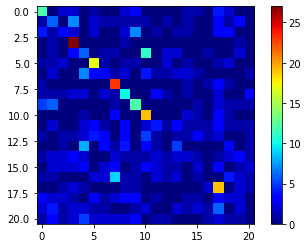

In [87]:
# Evaluate the performance of the model at the Testing phase
y_pred_test = model_RF.predict(X_test)

print('Mode Testing accuracy: % .3f' % accuracy_score(y_test, y_pred_test))
print('Model Testing kappa: % .3f' % cohen_kappa_score(y_test, y_pred_test))
print('Model Training f-score: % .3f' % f1_score(y_test, y_pred_test, average = 'weighted'))
cm_testing = confusion_matrix(y_test, y_pred_test)
print(cm_testing)
plt.imshow(cm_testing,cmap = 'jet')
plt.colorbar()
plt.show()

### 4. Apply Support Vector Machine for Classification